In [106]:
import pandas as pd

In [107]:
# Specify the path to your CSV file
file_path = "puf2022.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# View the DataFrame (optional)
print(df)

       WEIGHT  STATUS  FINALDEST  FOOTINGS  LEASE  LOCATION  REGION  PIERS  \
0     69.1571       2          1         3      2         1       3      1   
1     69.1571       2          1         3      2         2       3      1   
2     69.1571       2          1         3      2         3       3      1   
3     18.5789       2          1         3      2         2       4      1   
4     18.5789       2          1         4      2         1       4      3   
...       ...     ...        ...       ...    ...       ...     ...    ...   
7018   8.0368       3          9         9      9         9       5      9   
7019  21.2679       3          9         9      9         9       5      9   
7020  21.2679       3          9         9      9         9       5      9   
7021   5.9000       3          9         9      9         9       5      9   
7022   5.9000       3          9         9      9         9       5      9   

      SECURED  TITLED  ...  jprice  jsqft  jbedroom  jlease  jf

In [108]:
df.isna().sum()

WEIGHT        0
STATUS        0
FINALDEST     0
FOOTINGS      0
LEASE         0
LOCATION      0
REGION        0
PIERS         0
SECURED       0
TITLED        0
SECTIONS      0
PRICE         0
SQFT          0
BEDROOMS      0
SHIPMONTH     0
WGTADJ        0
CONTROL       0
jstatus       0
jprice        0
jsqft         0
jbedroom      0
jlease        0
jfinaldest    0
jtitle        0
jsecured      0
jlocation     0
jfootings     0
jpiers        0
dtype: int64

In [109]:
# Iterate through each column and delete rows with value '9'
for column in df.columns:
    # Check if '9' is present in the column
    if (df[column] == 9).any():
        # Delete rows where the value is '9'
        df = df[df[column] != 9]

In [110]:
# Show unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'WEIGHT': [69.1571 18.5789 11.45   15.7455 34.5786  6.193   9.2895  5.725   7.8727
 70.25   21.1474 15.3545 12.3167 35.125  10.5737  7.0491  6.1583  7.6773
 86.6571 25.4316 16.2333 18.4727 12.7158  8.4772 43.3286  9.2364  6.1576
  8.1167 22.3474 16.1545 76.2786 11.95   38.1393 11.1737  7.4491 25.4262
  8.0773  5.975  23.3053 71.3286 16.3727 12.7667 23.7762 35.6643 11.6526
  6.3833  8.1864  7.7684 79.4143 25.5579 18.2182 16.25   39.7071 12.7789
  8.5193  9.1091  8.125  57.1571 20.1053 14.6545 11.2    28.5786 10.0526
  6.7018  5.6     7.3273 71.9071 26.3158 20.3    16.1333 13.1579  8.7719
 35.9536  8.0667 23.969  10.15   59.65   23.8211 18.1091 14.6    29.825
 11.9105  7.3     9.0545  7.9404 56.7929 20.3158 15.7167 19.4636 28.3964
 10.1579  7.8583 18.931   9.7318  6.7719 19.1895 13.45   51.2143 17.2182
 25.6071  9.5947  8.6091  6.725  42.5357 16.0737 11.8    10.75    8.0368
  5.3579 21.2679 14.1786  5.9     5.375 ]
Unique values in column 'STATUS': [2 1]
Unique va

In [60]:
# Iterate through each column and delete rows with value '9'
for column in df.columns:
    # Check if '9' is present in the column
    if (df[column] == 'I').any():
        # Delete rows where the value is '9'
        df = df[df[column] != 'I']

In [111]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of your DataFrame
df_encoded = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column and apply label encoding
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'O':  # Check if the column contains object (string) data
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Show the modified DataFrame
print(df_encoded)

       WEIGHT  STATUS  FINALDEST  FOOTINGS  LEASE  LOCATION  REGION  PIERS  \
0     69.1571       2          1         3      2         1       3      1   
1     69.1571       2          1         3      2         2       3      1   
2     69.1571       2          1         3      2         3       3      1   
3     18.5789       2          1         3      2         2       4      1   
4     18.5789       2          1         4      2         1       4      3   
...       ...     ...        ...       ...    ...       ...     ...    ...   
6916   8.0368       1          1         1      2         2       4      0   
6917   5.3750       2          1         2      2         1       1      0   
6918   5.3750       2          1         1      2         1       1      0   
6919   5.3750       2          1         1      2         1       1      0   
6920   5.9000       2          1         1      2         3       2      0   

      SECURED  TITLED  ...  jprice  jsqft  jbedroom  jlease  jf

In [112]:
# Delete multiple columns
columns_to_drop = ['CONTROL', 'SHIPMONTH']
df = df_encoded.drop(columns_to_drop, axis=1)

In [113]:
# Save the modified DataFrame to a new CSV file
df.to_csv('Afiq_Hensem.csv', index=False)

In [114]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Afiq_Hensem.csv')

In [115]:
corr = df.corr()["PRICE"]
print(corr)

WEIGHT       -0.254803
STATUS        0.051302
FINALDEST          NaN
FOOTINGS     -0.030063
LEASE              NaN
LOCATION      0.141785
REGION        0.216177
PIERS         0.068657
SECURED      -0.008626
TITLED       -0.053949
SECTIONS      0.689532
PRICE         1.000000
SQFT          0.686081
BEDROOMS      0.234977
WGTADJ        0.157575
jstatus       0.101013
jprice        0.102486
jsqft         0.113324
jbedroom      0.113324
jlease        0.115384
jfinaldest    0.103648
jtitle        0.171269
jsecured      0.156128
jlocation     0.105302
jfootings     0.180197
jpiers        0.156757
Name: PRICE, dtype: float64


       Feature  Importance
10    SECTIONS    0.448831
11        SQFT    0.170920
0       WEIGHT    0.070045
13      WGTADJ    0.050533
6       REGION    0.033492
5     LOCATION    0.031755
15      jprice    0.030847
3     FOOTINGS    0.027312
7        PIERS    0.023064
9       TITLED    0.019901
8      SECURED    0.019710
12    BEDROOMS    0.018073
1       STATUS    0.015617
20      jtitle    0.007942
23   jfootings    0.006330
18      jlease    0.004770
19  jfinaldest    0.004134
22   jlocation    0.003621
24      jpiers    0.003425
21    jsecured    0.003378
16       jsqft    0.002531
17    jbedroom    0.002208
14     jstatus    0.001563
4        LEASE    0.000000
2    FINALDEST    0.000000


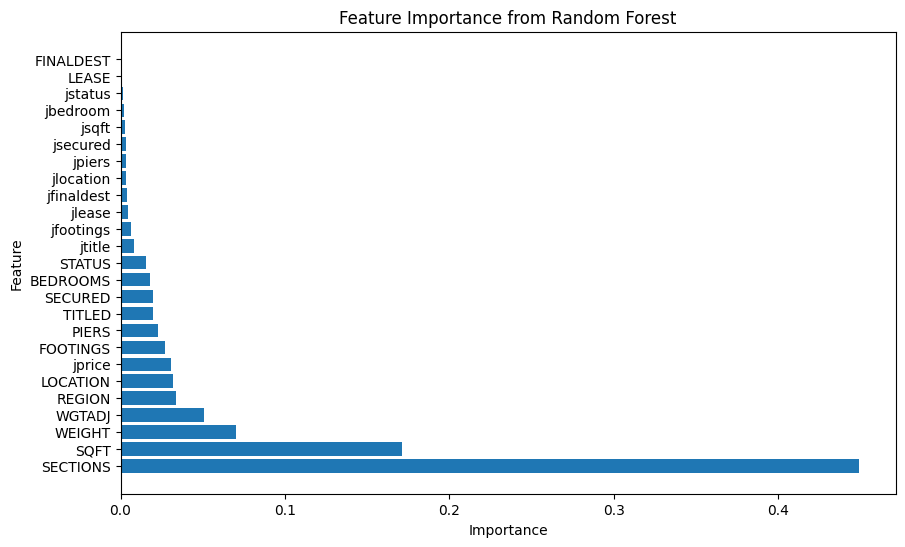

In [116]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Separate features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
rf_model.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

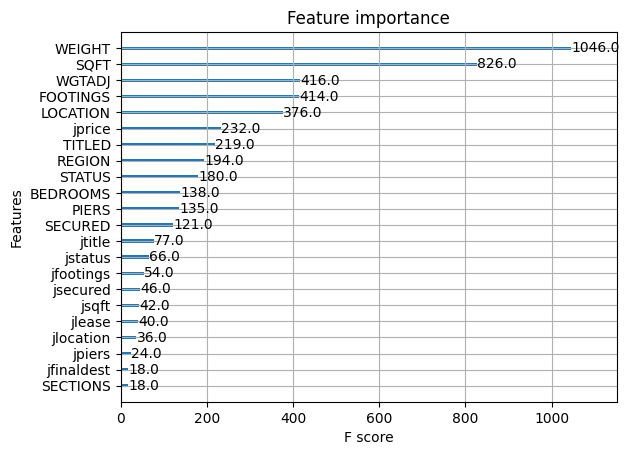

In [117]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt


# Separate features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Fit the model to your data
xgb_model.fit(X, y)

# Plot feature importance
plot_importance(xgb_model)
plt.show()

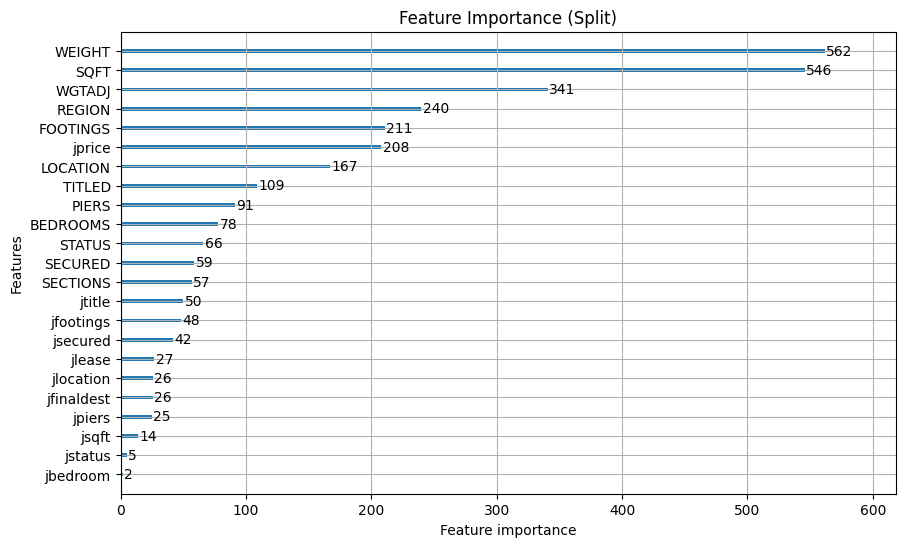

In [118]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt


# Separate features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Create a LightGBM dataset
lgb_dataset = lgb.Dataset(X, label=y)

# Specify parameters for the LightGBM model
params = {
    'objective': 'regression',  # Use 'regression' for regression problems
    'metric': 'rmse',  # Root Mean Squared Error for regression
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9,  # Percentage of features to consider for each round
    'bagging_fraction': 0.8,  # Percentage of data to randomly sample for each round
    'bagging_freq': 5,  # Frequency for bagging
    'verbose': 0  # Controls the level of LightGBM's verbosity
}

# Train the LightGBM model
lgb_model = lgb.train(params, lgb_dataset, num_boost_round=100)

# Plot feature importance
lgb.plot_importance(lgb_model, importance_type='split', figsize=(10, 6), title='Feature Importance (Split)')
plt.show()

       Feature   Coefficient
10    SECTIONS  34999.747254
23   jfootings   8371.463709
13      WGTADJ  -7886.009011
8      SECURED  -4966.373003
1       STATUS  -4878.687777
6       REGION   4715.113126
12    BEDROOMS  -4599.898238
7        PIERS   3643.911234
5     LOCATION  -3615.807831
19  jfinaldest   2530.204961
16       jsqft  -2516.281807
17    jbedroom  -2516.281807
20      jtitle   2145.835685
14     jstatus  -1925.865289
9       TITLED  -1900.022854
21    jsecured  -1816.597627
3     FOOTINGS  -1748.911650
22   jlocation  -1490.537312
15      jprice    907.376021
18      jlease    680.156433
24      jpiers    472.967991
0       WEIGHT   -159.029116
11        SQFT     56.442969
4        LEASE      0.000000
2    FINALDEST      0.000000


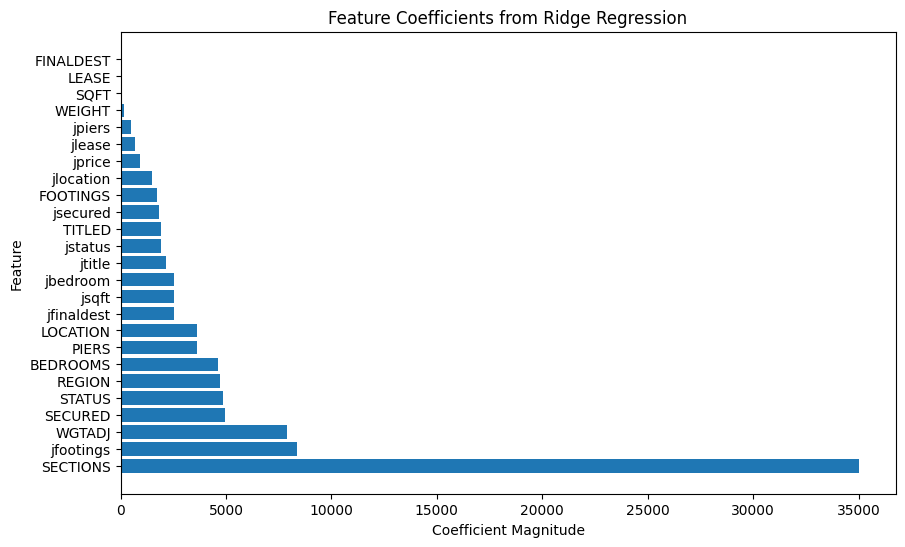

In [119]:
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Separate features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model to your data
ridge_model.fit(X, y)

# Get the coefficients of the features
coefficients = ridge_model.coef_

# Create a DataFrame to display feature coefficients
feature_coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by coefficient magnitude
feature_coefficients_df = feature_coefficients_df.reindex(
    feature_coefficients_df['Coefficient'].abs().sort_values(ascending=False).index
)

# Display the feature coefficients
print(feature_coefficients_df)

# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients_df['Feature'], feature_coefficients_df['Coefficient'].abs())
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Ridge Regression')
plt.show()

       Feature   Coefficient
10    SECTIONS  35153.414993
13      WGTADJ  -9270.242301
23   jfootings   8470.453830
16       jsqft  -5005.445661
8      SECURED  -4972.434569
1       STATUS  -4887.802861
6       REGION   4705.474893
12    BEDROOMS  -4608.050696
7        PIERS   3641.545220
5     LOCATION  -3623.398549
19  jfinaldest   2524.892990
20      jtitle   2078.468890
9       TITLED  -1897.307005
14     jstatus  -1885.978691
3     FOOTINGS  -1750.347995
21    jsecured  -1510.022194
22   jlocation  -1479.100090
15      jprice    908.401865
18      jlease    599.579530
0       WEIGHT   -157.850396
24      jpiers    124.386906
11        SQFT     56.371932
17    jbedroom     -0.000000
4        LEASE      0.000000
2    FINALDEST      0.000000


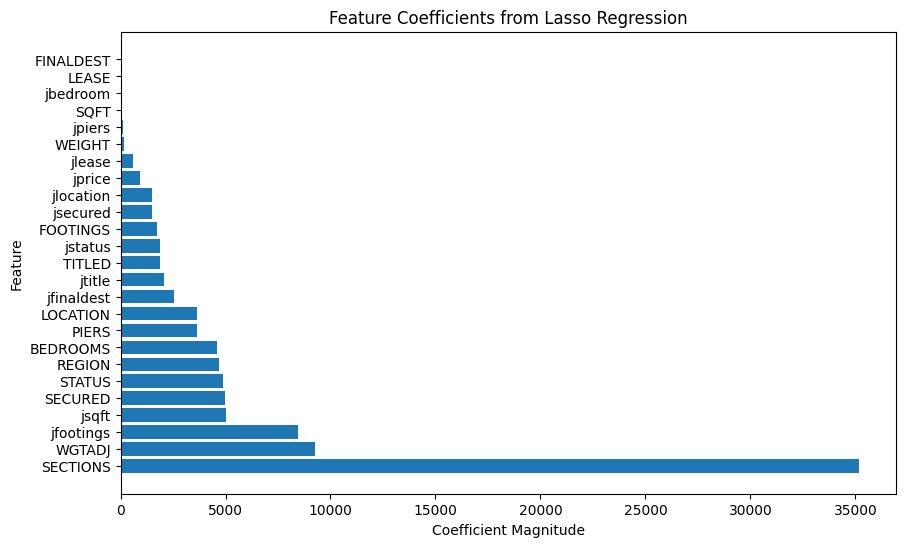

In [120]:
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


# Separate features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model to your data
lasso_model.fit(X, y)

# Get the coefficients of the features
coefficients = lasso_model.coef_

# Create a DataFrame to display feature coefficients
feature_coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by coefficient magnitude
feature_coefficients_df = feature_coefficients_df.reindex(
    feature_coefficients_df['Coefficient'].abs().sort_values(ascending=False).index
)

# Display the feature coefficients
print(feature_coefficients_df)

# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients_df['Feature'], feature_coefficients_df['Coefficient'].abs())
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Lasso Regression')
plt.show()

"LEASE"
"FINALDEST"
"jbedroom"
"jpiers"
"WEIGHT"
"jlease"
"jsecured"

In [121]:
# Delete multiple columns
columns_to_drop = ['jbedroom', 'FINALDEST', 'jpiers', 'LEASE', 'WEIGHT', 'jlease', 'jsecured']
df = df.drop(columns_to_drop, axis=1)

# Print the DataFrame
print(df)

      STATUS  FOOTINGS  LOCATION  REGION  PIERS  SECURED  TITLED  SECTIONS  \
0          2         3         1       3      1        1       2         1   
1          2         3         2       3      1        1       2         1   
2          2         3         3       3      1        1       2         1   
3          2         3         2       4      1        1       1         1   
4          2         4         1       4      3        2       2         1   
...      ...       ...       ...     ...    ...      ...     ...       ...   
2753       1         1         2       4      0        0       2         2   
2754       2         2         1       1      0        0       1         2   
2755       2         1         1       1      0        0       1         2   
2756       2         1         1       1      0        0       2         2   
2757       2         1         3       2      0        0       1         2   

       PRICE  SQFT  BEDROOMS  WGTADJ  jstatus  jprice  jsqft  j

In [122]:
# Save the modified DataFrame to a new CSV file
df.to_csv('Afiq_Hensem_feature_selection.csv', index=False)

In [123]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a DataFrame
df = pd.read_csv('Afiq_Hensem_feature_selection.csv')

# Separate the target variable
target_variable = 'PRICE'
y = df[target_variable]
X = df.drop(target_variable, axis=1)

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the features (excluding the target variable)
scaler.fit(X)

# Transform the features using the scaler
X_scaled = scaler.transform(X)

# Convert the scaled features back into a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Optional: Combine the scaled features with the target variable
df_scaled = pd.concat([X_scaled, y], axis=1)

# Print or save the scaled DataFrame
print(df_scaled)  # Or use 
df_scaled.to_csv('Afiq_Hensem_scaled_features_01.csv', index=False) 

        STATUS  FOOTINGS  LOCATION    REGION     PIERS   SECURED    TITLED  \
0     0.558645  0.100037 -0.969025  0.304856 -0.040211  0.178349  0.325693   
1     0.558645  0.100037  0.158166  0.304856 -0.040211  0.178349  0.325693   
2     0.558645  0.100037  1.285358  0.304856 -0.040211  0.178349  0.325693   
3     0.558645  0.100037  0.158166  1.232883 -0.040211  0.178349 -1.627048   
4     0.558645  0.978708 -0.969025  1.232883  2.177848  1.770216  0.325693   
...        ...       ...       ...       ...       ...       ...       ...   
2753 -1.790047 -1.657304  0.158166  1.232883 -1.149241 -1.413518  0.325693   
2754  0.558645 -0.778634 -0.969025 -1.551198 -1.149241 -1.413518 -1.627048   
2755  0.558645 -1.657304 -0.969025 -1.551198 -1.149241 -1.413518 -1.627048   
2756  0.558645 -1.657304 -0.969025 -1.551198 -1.149241 -1.413518  0.325693   
2757  0.558645 -1.657304  1.285358 -0.623171 -1.149241 -1.413518 -1.627048   

      SECTIONS      SQFT  BEDROOMS    WGTADJ   jstatus    jpric

In [124]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Afiq_Hensem_scaled_features_01.csv')

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


# Assuming 'PRICE' is the target variable
target_variable = 'PRICE'

# Extract features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regressor
lasso_regressor = Lasso(alpha=0.01)  # You may need to tune the alpha parameter

# Fit the Lasso model
lasso_regressor.fit(X_train, y_train)

# Predict on the test set using Lasso
lasso_pred = lasso_regressor.predict(X_test)

# Initialize the XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Fit the XGBoost model
xgb_regressor.fit(X_train, y_train)

# Predict on the test set using XGBoost
xgb_pred = xgb_regressor.predict(X_test)

# Set the weights for the hybrid model
lasso_weight = 0.65
xgb_weight = 0.35

# Combine predictions with weights
hybrid_pred = lasso_weight * lasso_pred + xgb_weight * xgb_pred

# Calculate metrics for the hybrid model
rmse = np.sqrt(mean_squared_error(y_test, hybrid_pred))
rae = mean_absolute_error(y_test, hybrid_pred)
mape = np.mean(np.abs((y_test - hybrid_pred) / y_test)) * 100
rmsle = np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(hybrid_pred), 2)))

# Print the results
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Relative Absolute Error (RAE): {:.2f}".format(rae))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("Root Mean Squared Logarithmic Error (RMSLE): {:.2f}".format(rmsle))

Root Mean Squared Error (RMSE): 30670.54
Relative Absolute Error (RAE): 20054.11
Mean Absolute Percentage Error (MAPE): 14.86%
Root Mean Squared Logarithmic Error (RMSLE): 0.20
